# Introduction

In this notebook, we will do a comprehensive analysis of the Android app market by comparing thousands of apps in the Google Play store.

# About the Dataset of Google Play Store Apps & Reviews

**Data Source:** <br>
App and review data was scraped from the Google Play Store by Lavanya Gupta in 2018. Original files listed [here](
https://www.kaggle.com/lava18/google-play-store-apps).

# Import Statements

In [69]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px

# Notebook Presentation

In [70]:
# Show numeric output in decimal format e.g., 2.15
pd.options.display.float_format = '{:,.2f}'.format

# Read the Dataset

In [71]:
df_apps = pd.read_csv('apps.csv')

# Data Cleaning

**Challenge**: How many rows and columns does `df_apps` have? What are the column names? Look at a random sample of 5 different rows with [.sample()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.sample.html).

In [72]:
row_count = len(df_apps)
col_names = df_apps.columns.tolist()
col_count = len(col_names)

In [73]:
print(f"There are {row_count} rows")
print(f"There are {col_count} columns: {col_names}")

There are 10841 rows
There are 12 columns: ['App', 'Category', 'Rating', 'Reviews', 'Size_MBs', 'Installs', 'Type', 'Price', 'Content_Rating', 'Genres', 'Last_Updated', 'Android_Ver']


In [74]:
_sample = df_apps.sample(n=5)
print(_sample)

                                                App  Category  Rating  \
9267                                        Walmart  SHOPPING    4.40   
1807                                Bu Hangi Dizi ?      GAME     NaN   
7375                              WiFi Overview 360     TOOLS    4.10   
2166                                     Arogyam EH   MEDICAL    3.60   
8973  FIFA - Tournaments, Soccer News & Live Scores    SPORTS    4.20   

      Reviews  Size_MBs    Installs  Type Price Content_Rating    Genres  \
9267   441473      9.30  10,000,000  Free     0       Everyone  Shopping   
1807       14     19.00       1,000  Free     0       Everyone    Trivia   
7375    15693     18.00   1,000,000  Free     0       Everyone     Tools   
2166       18      3.50       1,000  Free     0       Everyone   Medical   
8973   342909      6.00  10,000,000  Free     0       Everyone    Sports   

        Last_Updated         Android_Ver  
9267   July 30, 2018  Varies with device  
1807     May 4, 20

### Drop Unused Columns

**Challenge**: Remove the columns called `Last_Updated` and `Android_Version` from the DataFrame. We will not use these columns. 

In [75]:
apps_df = df_apps.drop(columns=['Last_Updated', 'Android_Ver'])

### Find and Remove NaN values in Ratings

**Challenge**: How may rows have a NaN value (not-a-number) in the Ratings column? Create DataFrame called `df_apps_clean` that does not include these rows. 

In [76]:
nan_rows = apps_df[apps_df['Rating'].isna()]
print(f"{len(nan_rows)} rows have NaN ratings")

1474 rows have NaN ratings


In [77]:
df_apps_clean = apps_df.dropna()

### Find and Remove Duplicates

**Challenge**: Are there any duplicates in data? Check for duplicates using the [.duplicated()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.duplicated.html) function. How many entries can you find for the "Instagram" app? Use [.drop_duplicates()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.drop_duplicates.html) to remove any duplicates from `df_apps_clean`. 


In [78]:
dup_results = df_apps_clean.duplicated().values.tolist()
print(f'There are {("no " if True not in dup_results else "")}duplicates')

There are duplicates


In [79]:
instas = df_apps_clean[df_apps_clean['App']=='Instagram']
print(f"There are {len(instas)} Instagram entries")

There are 4 Instagram entries


In [80]:
df_apps_clean = df_apps_clean.drop_duplicates()
dup_results2 = df_apps_clean.duplicated().values.tolist()
print(f'There are {("no " if True not in dup_results2 else "")}duplicates')

There are no duplicates


# Find Highest Rated Apps

**Challenge**: Identify which apps are the highest rated. What problem might you encounter if you rely exclusively on ratings alone to determine the quality of an app?

In [81]:
max_rating = max(df_apps_clean['Rating'].values.tolist())
highest_rated_apps = df_apps_clean[df_apps_clean['Rating']==max_rating]
print(f"Highest rated ({max_rating}) apps:\n")
for hra in highest_rated_apps['App'].values.tolist():
    print(f"  -- {hra}")

Highest rated (5.0) apps:

  -- KBA-EZ Health Guide
  -- Ra Ga Ba
  -- Mu.F.O.
  -- Brick Breaker BR
  -- Anatomy & Physiology Vocabulary Exam Review App
  -- Tablet Reminder
  -- CQ ESPM
  -- Clinic Doctor EHr
  -- EB Cash Collections
  -- CZ-Help
  -- CB Heroes
  -- ei Calc
  -- CG Jobs
  -- Bh Public School
  -- EJ messenger
  -- BU Study
  -- CB Register
  -- Basics of Orthopaedics
  -- ER Assist
  -- CJ the REALTOR
  -- Story Time FD
  -- NCLEX Multi-topic Nursing Exam Review-Quiz & notes
  -- DN Blog
  -- Barbers.BH
  -- Trovami se ci riesci
  -- EC Mover
  -- Monster Ride Pro
  -- FAST EO
  -- AC DC Power Monitor
  -- DT CLOTHINGS
  -- 30WPM Amateur ham radio Koch CW Morse code trainer
  -- BM speed test
  -- FK CLASSIC FOR YOU
  -- CZ Kompas
  -- AJ Rafael Music Lessons
  -- AJ Gray Dark Icon Pack
  -- DF Glue Board
  -- 211:CK
  -- i am EB
  -- DG OFF - 100% Free Coupons & Deals
  -- Tic Tac CK
  -- DL Image Manager
  -- EC SPORTS
  -- Labs on Demand
  -- Chronolink DX
  -- Wo

# Find 5 Largest Apps in terms of Size (MBs)

**Challenge**: What's the size in megabytes (MB) of the largest Android apps in the Google Play Store. Based on the data, do you think there could be limit in place or can developers make apps as large as they please? 

In [82]:
top_five_largest = df_apps_clean.sort_values(by='Size_MBs', ascending=False).head(n=5)
largest_size = top_five_largest['Size_MBs'].values.tolist()[0]
print(f"largest size = {largest_size} MB")
print(f"number of apps with size of {largest_size} MB = {len(df_apps_clean[df_apps_clean['Size_MBs']==largest_size])}/{len(df_apps_clean)}")

largest size = 100.0 MB
number of apps with size of 100.0 MB = 16/8891


# Find the 5 Apps with Most Reviews

**Challenge**: Which apps have the highest number of reviews? Are there any paid apps among the top 50?

In [83]:
top_five_most_reviewed = df_apps_clean.sort_values(by='Reviews', ascending=False).head(n=5)
highest_review_count = top_five_most_reviewed['Reviews'].values.tolist()[0]

print("Five apps with the most reviews:\n")
for tfmr in top_five_most_reviewed['App'].values.tolist():
    print(f"  -- {tfmr}")
print("\n")
top_fifty_most_reviewed = df_apps_clean.sort_values(by='Reviews', ascending=False).head(n=50)
paid_in_top_fifty = top_fifty_most_reviewed[top_fifty_most_reviewed['Type']=='Paid']
print(f"there are {len(paid_in_top_fifty)} paid apps among the top 50")

Five apps with the most reviews:

  -- Facebook
  -- Facebook
  -- WhatsApp Messenger
  -- WhatsApp Messenger
  -- Instagram


there are 0 paid apps among the top 50


# Plotly Pie and Donut Charts - Visualise Categorical Data: Content Ratings

In [84]:
content_ratings = df_apps_clean.groupby('Content_Rating')
categories = content_ratings.count().index.tolist()
category_counts = [0] * len(categories)

for c in range(len(categories)):
    _category = categories[c]
    category_counts[c] = len(content_ratings.get_group(_category))    

Text(0.5, 1.0, 'Content Rating Distribution')

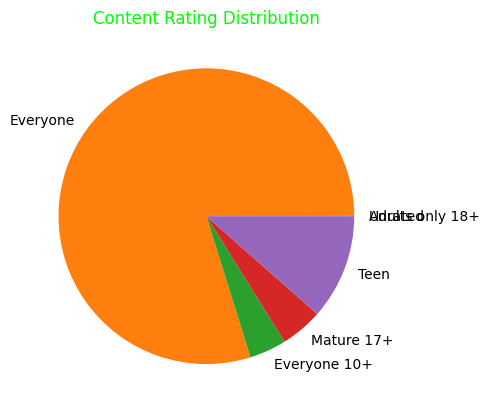

In [85]:
plt.figure()
plt.pie(category_counts, labels=categories)
plt.title("Content Rating Distribution", color='lime')

In [86]:
ratings = df_apps_clean['Content_Rating'].value_counts()
plt.figure()
px.pie(
    labels=ratings.index,
    values=ratings.values,
    title="Content Rating",
    names=ratings.index,
    hole=0.5
)

<Figure size 640x480 with 0 Axes>

# Numeric Type Conversion: Examine the Number of Installs

**Challenge**: How many apps had over 1 billion (that's right - BILLION) installations? How many apps just had a single install? 

Check the datatype of the Installs column.

Count the number of apps at each level of installations. 

Convert the number of installations (the Installs column) to a numeric data type. Hint: this is a 2-step process. You'll have make sure you remove non-numeric characters first. 

In [87]:
installs = df_apps_clean['Installs'].values.tolist()
install_counts_ints = [int(install.replace(',','')) for install in installs]

_df_apps_clean = df_apps_clean.copy()
_df_apps_clean['Installs'] = install_counts_ints

billion_installs = _df_apps_clean[_df_apps_clean['Installs']>=1000000000]
single_installs = _df_apps_clean[_df_apps_clean['Installs']==1]
print(f"{len(billion_installs)} apps had at least 1 billion installs")
print(f"{len(single_installs)} apps had 1 install")

49 apps had at least 1 billion installs
3 apps had 1 install


In [88]:
print(df_apps_clean['Installs'].dtype)

object


In [89]:
x = _df_apps_clean.groupby('Installs')
install_counts = x.count().index.tolist()
counts_per_install_quantity = [0]*len(install_counts)

for i in range(len(install_counts)):
    counts_per_install_quantity[i] = len(x.get_group(install_counts[i]))    

<BarContainer object of 19 artists>

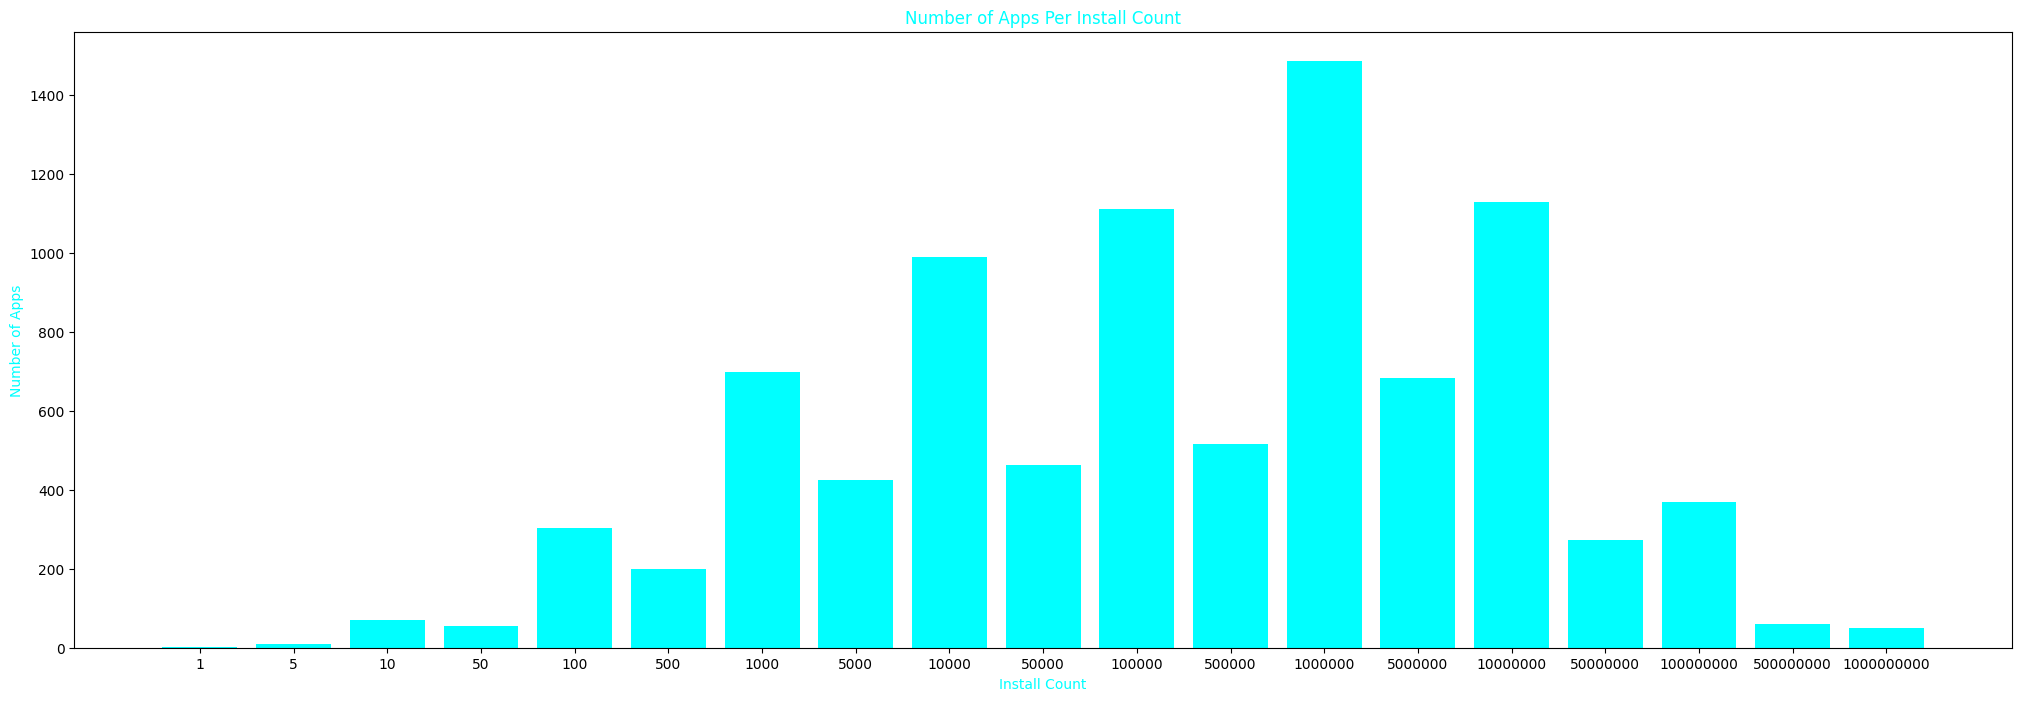

In [90]:
plt.figure(figsize=(25,8))
plt.title("Number of Apps Per Install Count", color='cyan')
plt.xlabel("Install Count", color='cyan')
plt.ylabel("Number of Apps", color='cyan')
plt.bar([str(ic) for ic in install_counts], counts_per_install_quantity, color='cyan')

# Find the Most Expensive Apps, Filter out the Junk, and Calculate a (ballpark) Sales Revenue Estimate

Let's examine the Price column more closely.

**Challenge**: Convert the price column to numeric data. Then investigate the top 20 most expensive apps in the dataset.

Remove all apps that cost more than $250 from the `df_apps_clean` DataFrame.

Add a column called 'Revenue_Estimate' to the DataFrame. This column should hold the price of the app times the number of installs. What are the top 10 highest grossing paid apps according to this estimate? Out of the top 10 highest grossing paid apps, how many are games?


In [91]:
# convert price to numeric data
prices_raw = _df_apps_clean['Price'].values.tolist()
prices_float = [ float(price.replace('$',''))  for price in prices_raw]

df_apps_clean = _df_apps_clean.copy()
df_apps_clean['Price'] = prices_float

top_20_most_expensive = df_apps_clean.sort_values(by='Price', ascending=False).head(n=20)
top_20_app_names = top_20_most_expensive['App'].values.tolist()
top_20_app_price = top_20_most_expensive['Price'].values.tolist()
print("top 20 most expensive apps:\n")
for app_name, app_price in list(zip(top_20_app_names, top_20_app_price)):
    print(f"  -- {app_name} ... ${app_price}")

top 20 most expensive apps:

  -- I'm Rich - Trump Edition ... $400.0
  -- I am rich ... $399.99
  -- I Am Rich Pro ... $399.99
  -- most expensive app (H) ... $399.99
  -- 💎 I'm rich ... $399.99
  -- I am rich(premium) ... $399.99
  -- I am Rich Plus ... $399.99
  -- I Am Rich Premium ... $399.99
  -- I am Rich ... $399.99
  -- I am Rich! ... $399.99
  -- I am rich (Most expensive app) ... $399.99
  -- I AM RICH PRO PLUS ... $399.99
  -- I Am Rich ... $389.99
  -- I am extremely Rich ... $379.99
  -- I am rich VIP ... $299.99
  -- Vargo Anesthesia Mega App ... $79.99
  -- LTC AS Legal ... $39.99
  -- I am Rich Person ... $37.99
  -- A Manual of Acupuncture ... $33.99
  -- Golfshot Plus: Golf GPS ... $29.99


### The most expensive apps sub $250

In [92]:
# remove all apps over $250
df_apps_u250 = df_apps_clean[df_apps_clean['Price']<=250.00]

prices = df_apps_u250['Price'].values.tolist()
installs = df_apps_u250['Installs'].values.tolist()
results = [prices[e]*installs[e] for e in range(len(prices))]

df_apps_u250.insert(loc=8, column='Revenue_Estimate', value=results)

### Highest Grossing Paid Apps (ballpark estimate)

In [93]:
top_10_highest_grossing = df_apps_u250.sort_values(by='Revenue_Estimate', ascending=False).head(10)
app_names = top_10_highest_grossing['App'].values.tolist()
app_revenue = top_10_highest_grossing['Revenue_Estimate'].values.tolist()
print("top 10 highest grossing apps:\n")
for _name, _revenue in list(zip(app_names, app_revenue)):
    print(f"  -- {_name} ... ${_revenue}")

game_count = len(top_10_highest_grossing[top_10_highest_grossing['Category']=='GAME'])
print(f"\namong these 10 apps, {game_count} {'is a' if game_count==1 else 'are'} game{'s' if game_count>1 else ''}")

top 10 highest grossing apps:

  -- Minecraft ... $69900000.0
  -- Minecraft ... $69900000.0
  -- Hitman Sniper ... $9900000.0
  -- Grand Theft Auto: San Andreas ... $6990000.0
  -- Facetune - For Free ... $5990000.0
  -- Sleep as Android Unlock ... $5990000.0
  -- DraStic DS Emulator ... $4990000.0
  -- Weather Live ... $2995000.0
  -- Threema ... $2990000.0
  -- Tasker ... $2990000.0

among these 10 apps, 3 are games


# Plotly Bar Charts & Scatter Plots: Analysing App Categories

In [94]:
app_category_groups = df_apps_clean.groupby('Category')
app_categories = app_category_groups.count().index.tolist()
app_category_counts = [0]*len(app_categories)

for ac in range(len(app_categories)):
    _app_cat = app_categories[ac]
    _filter = app_category_groups.get_group(_app_cat)
    app_category_counts[ac]=len(_filter)

### Vertical Bar Chart - Highest Competition (Number of Apps)

<BarContainer object of 17 artists>

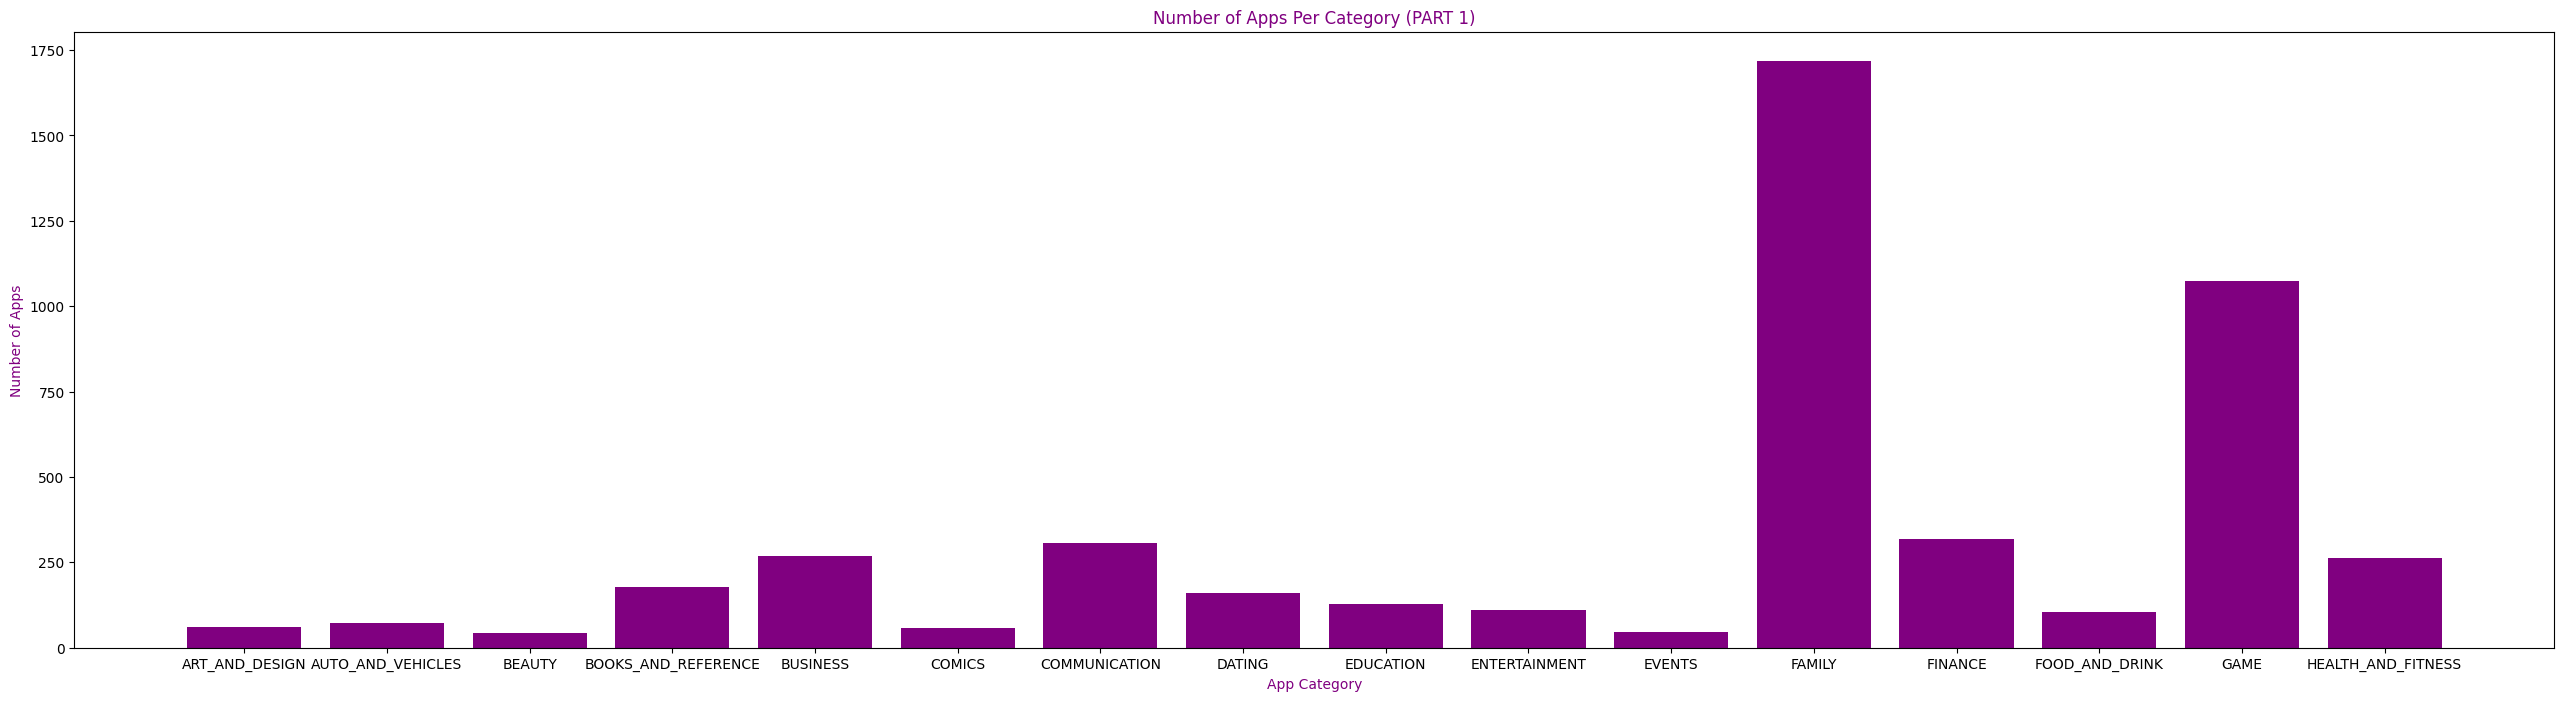

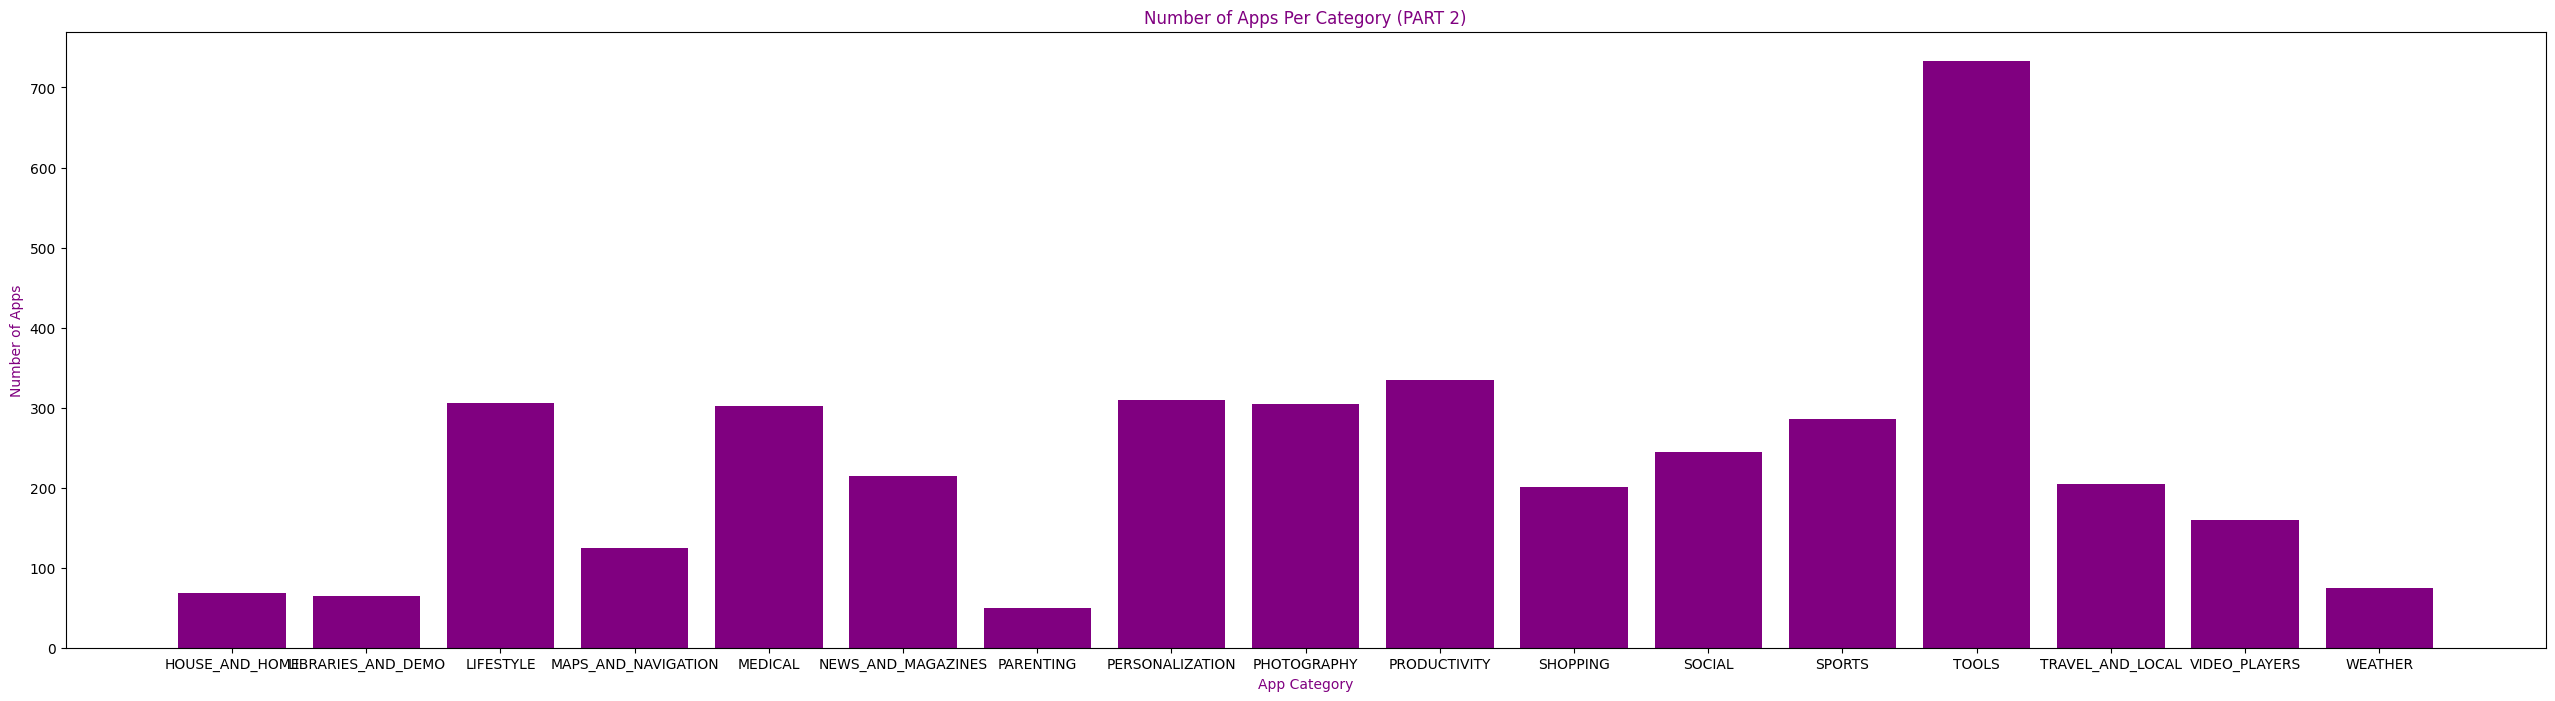

In [95]:
plt.figure(figsize=(32,8))
plt.title("Number of Apps Per Category (PART 1)", color='purple')
plt.xlabel("App Category", color='purple')
plt.ylabel("Number of Apps", color='purple')
plt.bar(app_categories[:(len(app_categories)//2)], app_category_counts[:(len(app_categories)//2)], color='purple')

plt.figure(figsize=(32,8))
plt.title("Number of Apps Per Category (PART 2)", color='purple')
plt.xlabel("App Category", color='purple')
plt.ylabel("Number of Apps", color='purple')
plt.bar(app_categories[(len(app_categories)//2):], app_category_counts[(len(app_categories)//2):], color='purple')

### Horizontal Bar Chart - Most Popular Categories (Highest Downloads)

In [96]:
app_categories = app_category_groups.count().index.tolist()
app_category_popularities = [0]*len(app_categories)
for ac in range(len(app_categories)):
    _app_cat = app_categories[ac]
    _filter = app_category_groups.get_group(_app_cat)
    _download_count = _filter.sum()['Installs']
    app_category_popularities[ac] = _download_count

<BarContainer object of 17 artists>

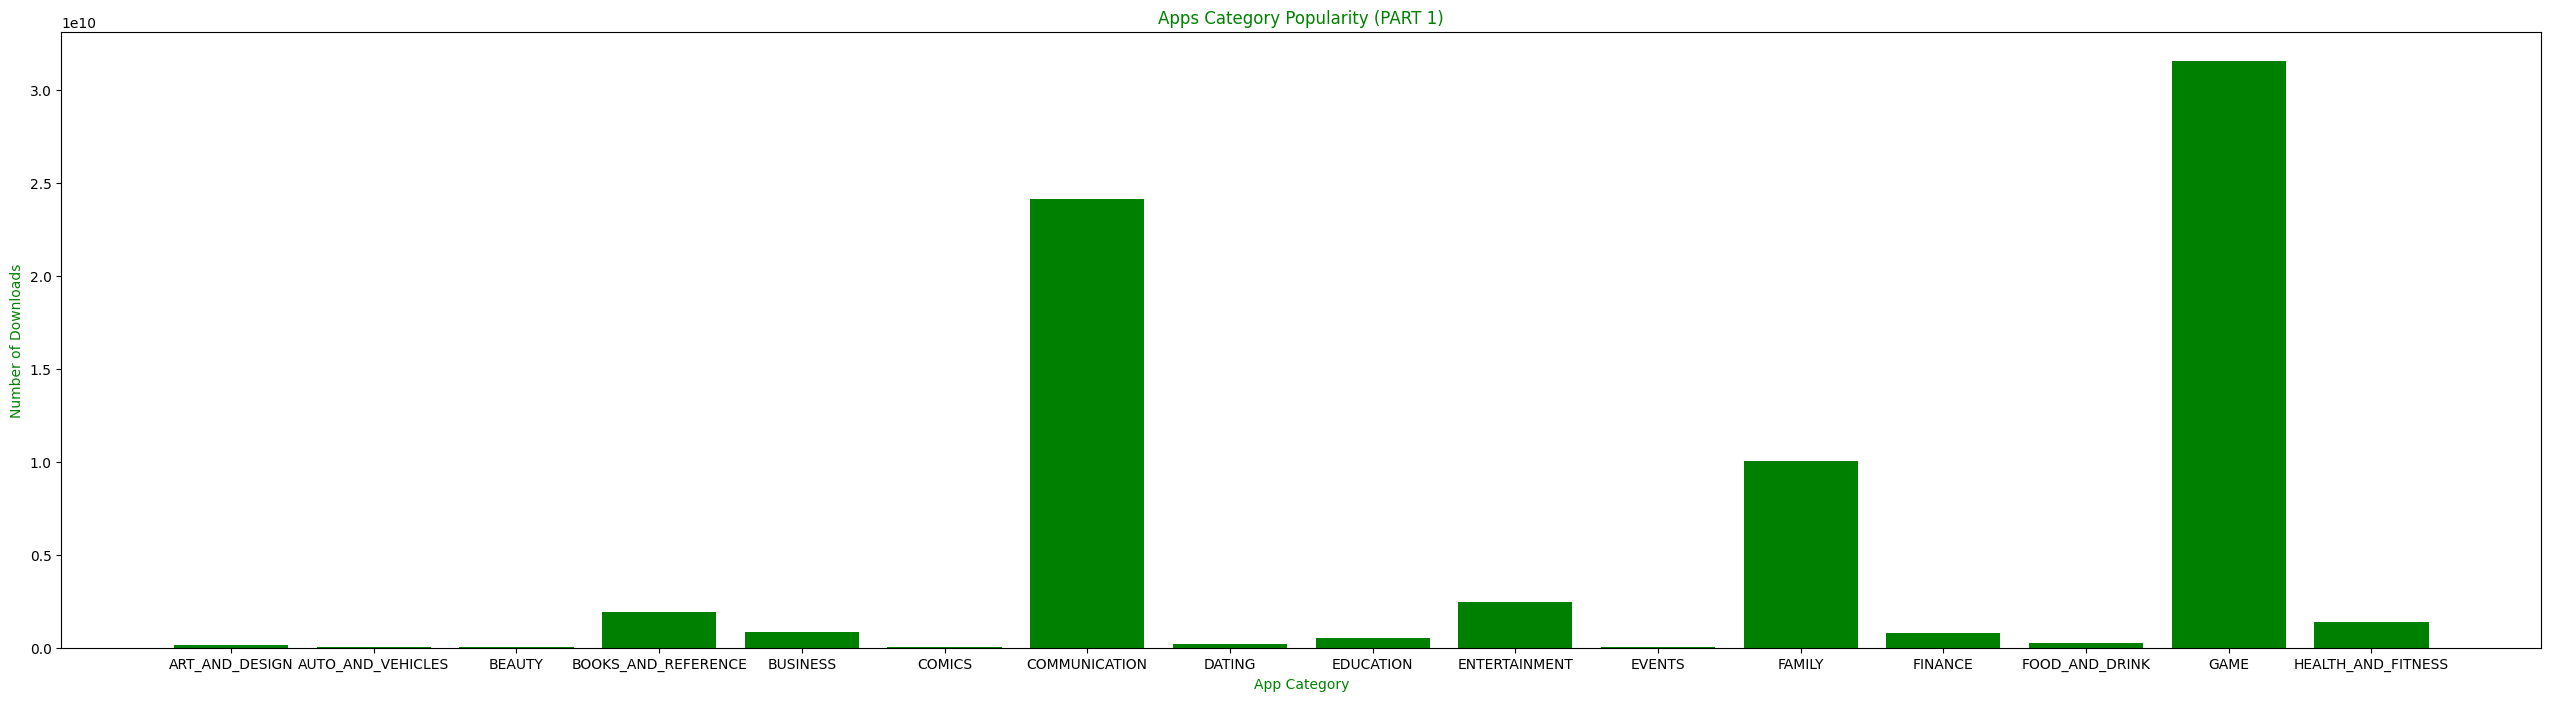

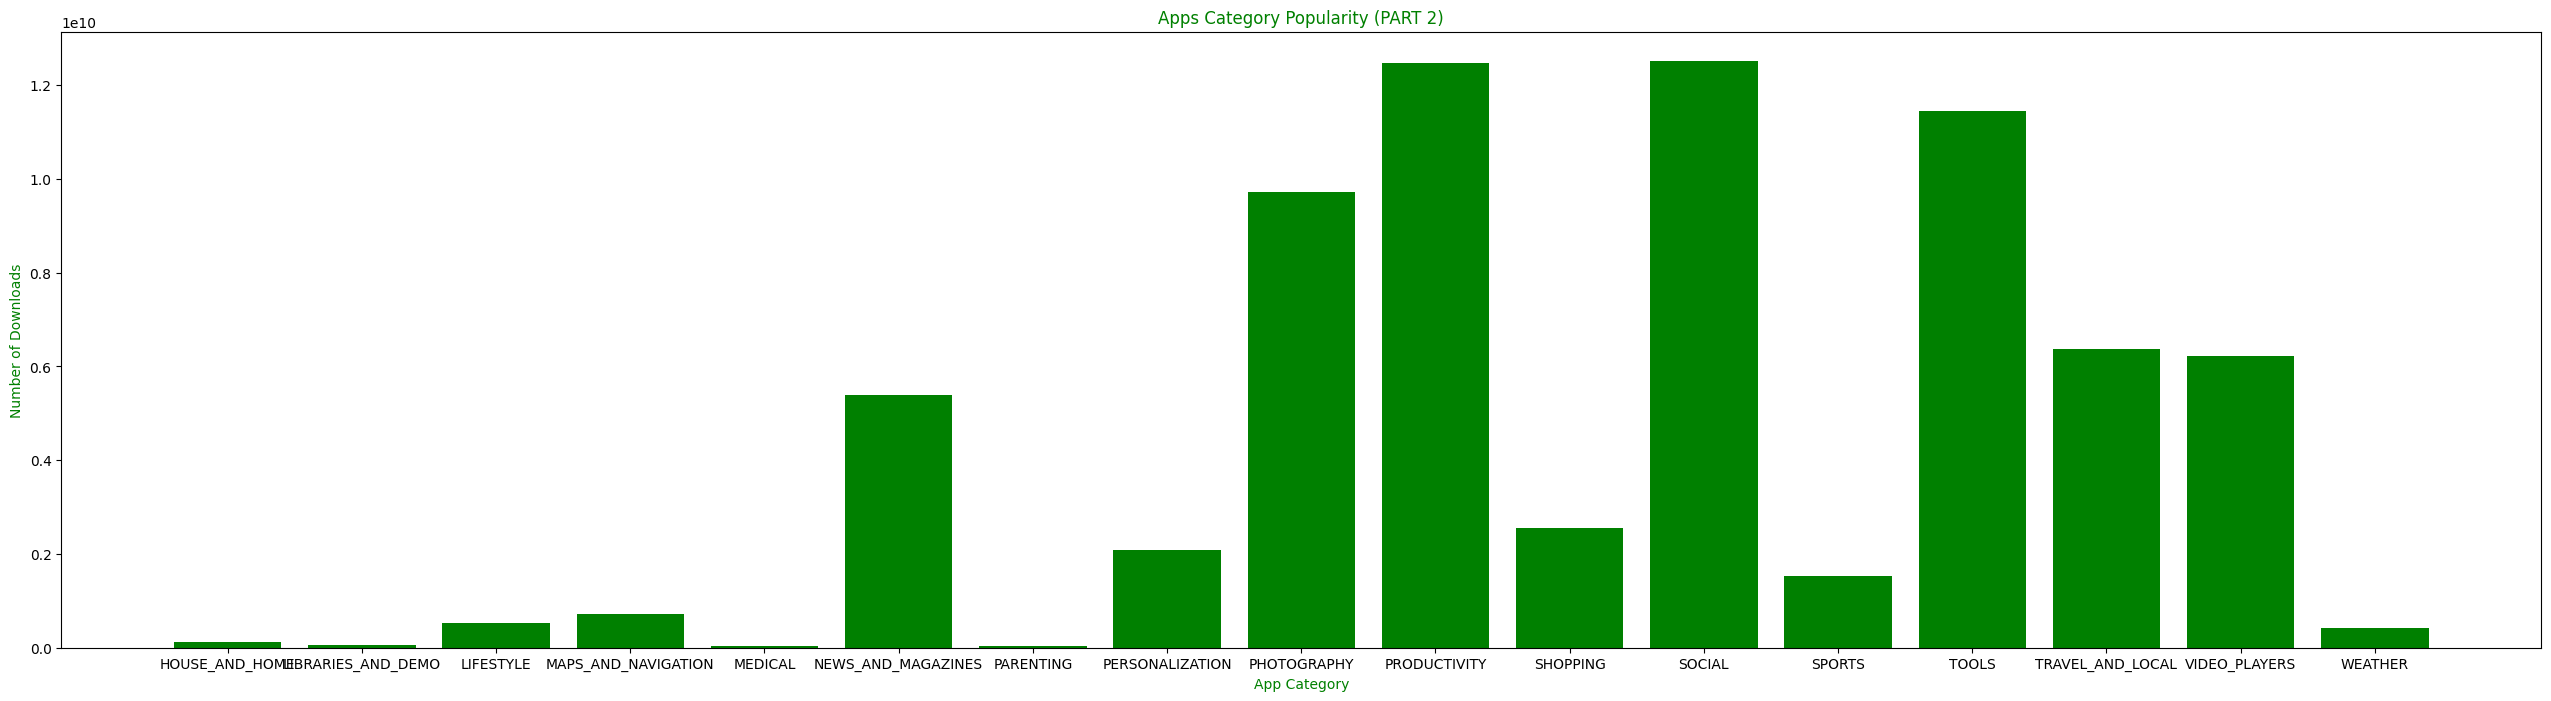

In [97]:
plt.figure(figsize=(32,8))
plt.title("Apps Category Popularity (PART 1)", color='green')
plt.xlabel("App Category", color='green')
plt.ylabel("Number of Downloads", color='green')
plt.bar(app_categories[:(len(app_categories)//2)], app_category_popularities[:(len(app_categories)//2)], color='green')

plt.figure(figsize=(32,8))
plt.title("Apps Category Popularity (PART 2)", color='green')
plt.xlabel("App Category", color='green')
plt.ylabel("Number of Downloads", color='green')
plt.bar(app_categories[(len(app_categories)//2):], app_category_popularities[(len(app_categories)//2):], color='green')

### Category Concentration - Downloads vs. Competition

**Challenge**: 
* First, create a DataFrame that has the number of apps in one column and the number of installs in another:

<img src=https://imgur.com/uQRSlXi.png width="350">

* Then use the [plotly express examples from the documentation](https://plotly.com/python/line-and-scatter/) alongside the [.scatter() API reference](https://plotly.com/python-api-reference/generated/plotly.express.scatter.html)to create scatter plot that looks like this. 

<img src=https://imgur.com/cHsqh6a.png>

*Hint*: Use the size, hover_name and color parameters in .scatter(). To scale the yaxis, call .update_layout() and specify that the yaxis should be on a log-scale like so: yaxis=dict(type='log') 

In [98]:
category_number = df_apps_clean.groupby('Category').agg({'App': pd.Series.count}) # number of apps per category
category_installs = df_apps_clean.groupby('Category').agg({'Installs': pd.Series.sum}) # number of installs per category
category_installs.sort_values('Installs', ascending=True, inplace=True)

category_merged_df = pd.merge(category_number, category_installs, on='Category', how="inner")
category_merged_df.sort_values('Installs', ascending=False)

my_plot = px.scatter(category_merged_df, # data
                    x='App', # column name for X axis
                    y='Installs', # column name for Y axis
                    title='Category Concentration',
                    size='App', # the higher the value in column 'App', the bigger the dot
                    hover_name=category_merged_df.index,
                    color='Installs')
 
my_plot.update_layout(xaxis_title="Number of Apps Per Category (Lower = More Concentrated)",
                      yaxis_title="Installs",
                      yaxis=dict(type='log'))
 
my_plot.show()

# Extracting Nested Data from a Column

**Challenge**: How many different types of genres are there? Can an app belong to more than one genre? Check what happens when you use .value_counts() on a column with nested values? See if you can work around this problem by using the .split() function and the DataFrame's [.stack() method](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.stack.html). 


In [99]:
unique_genres = list(set(df_apps_clean['Genres'].values.tolist()))
print(f"we have {len(unique_genres)} different app genres")

we have 115 different app genres


In [100]:
stack = df_apps_clean.Genres.str.split(';', expand=True).stack()
official_unique_genres = list(set(stack.values.tolist()))
print(f"we officially have {len(official_unique_genres)} different app genres")

num_genres = stack.value_counts()

we officially have 53 different app genres


# Colour Scales in Plotly Charts - Competition in Genres

**Challenge**: Can you create this chart with the Series containing the genre data? 

<img src=https://imgur.com/DbcoQli.png width=400>

Try experimenting with the built in colour scales in Plotly. You can find a full list [here](https://plotly.com/python/builtin-colorscales/). 

* Find a way to set the colour scale using the color_continuous_scale parameter. 
* Find a way to make the color axis disappear by using coloraxis_showscale. 

In [101]:
bar = px.bar(x = num_genres.index[:15], # index = category name
             y = num_genres.values[:15], # count
             title='Top Genres',
             hover_name=num_genres.index[:15],
             color=num_genres.values[:15],
             color_continuous_scale='Agsunset')
 
bar.update_layout(xaxis_title='Genre',
yaxis_title='Number of Apps',
coloraxis_showscale=False)
 
bar.show()

# Grouped Bar Charts: Free vs. Paid Apps per Category

In [102]:
# this is the number of free vs paid apps per category
df_free_vs_paid = df_apps_clean.groupby(["Category", "Type"], as_index=False).agg({'App': pd.Series.count})

**Challenge**: Use the plotly express bar [chart examples](https://plotly.com/python/bar-charts/#bar-chart-with-sorted-or-ordered-categories) and the [.bar() API reference](https://plotly.com/python-api-reference/generated/plotly.express.bar.html#plotly.express.bar) to create this bar chart: 

<img src=https://imgur.com/LE0XCxA.png>

You'll want to use the `df_free_vs_paid` DataFrame that you created above that has the total number of free and paid apps per category. 

See if you can figure out how to get the look above by changing the `categoryorder` to 'total descending' as outlined in the documentation here [here](https://plotly.com/python/categorical-axes/#automatically-sorting-categories-by-name-or-total-value). 

In [103]:
g_bar = px.bar(df_free_vs_paid,
               x='Category',
               y='App',
               title='Free vs Paid Apps by Category',
               color='Type',
               barmode='group')
 
g_bar.update_layout(xaxis_title='Category',
                    yaxis_title='Number of Apps',
                    xaxis={'categoryorder':'total descending'},
                    yaxis=dict(type='log'))
 
g_bar.show()

# Plotly Box Plots: Lost Downloads for Paid Apps

**Challenge**: Create a box plot that shows the number of Installs for free versus paid apps. How does the median number of installations compare? Is the difference large or small?

Use the [Box Plots Guide](https://plotly.com/python/box-plots/) and the [.box API reference](https://plotly.com/python-api-reference/generated/plotly.express.box.html) to create the following chart. 

<img src=https://imgur.com/uVsECT3.png>


median for free app installs = 500000
median for paid app installs = 5000


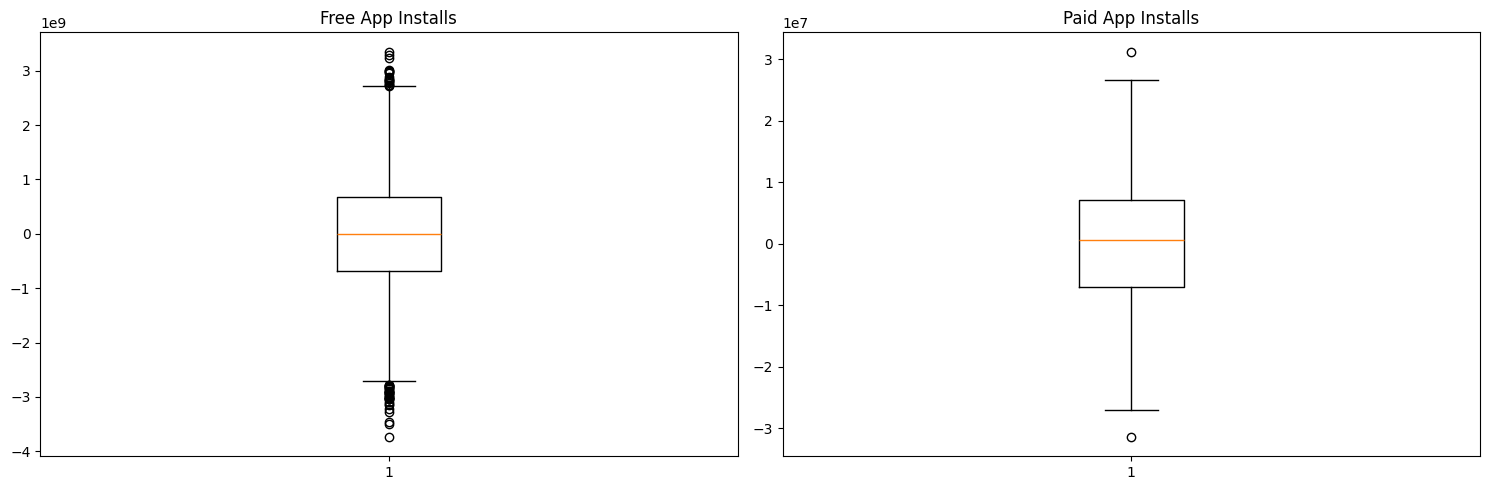

In [104]:
frame = df_apps_clean[['Type', 'Installs']]

# free apps
free = frame[frame['Type']=='Free']
free_installs = free['Installs'].values.tolist()
free_installs = sorted(free_installs)
min_free_installs = min(free_installs)
max_free_installs = max(free_installs)
med_free_installs = 0
if len(free_installs) % 2 != 0:
    med_free_installs = free_installs[len(free_installs)//2]
else:
    f = len(free_installs)//2
    med_free_installs = (free_installs[f] + free_installs[f-1]) // 2

# paid apps
paid = frame[frame['Type']=='Paid']
paid_installs = paid['Installs'].values.tolist()
paid_installs = sorted(paid_installs)
min_paid_installs = min(paid_installs)
max_paid_installs = max(paid_installs)
med_paid_installs = 0
if len(paid_installs) % 2 != 0:
    med_paid_installs = paid_installs[len(paid_installs)//2]
else:
    p = len(paid_installs)//2
    med_paid_installs = (paid_installs[p] + paid_installs[p-1]) // 2

print(f"median for free app installs = {med_free_installs}")
print(f"median for paid app installs = {med_paid_installs}")

data1 = np.random.normal(min_free_installs, max_free_installs, len(free_installs))
data2 = np.random.normal(min_paid_installs, max_paid_installs, len(paid_installs))

# Creates subplots
fig, axs = plt.subplots(1, 2, figsize=(15, 5))

axs[0].boxplot(data1)
axs[0].set_title('Free App Installs')

axs[1].boxplot(data2)
axs[1].set_title('Paid App Installs')

# Adjusts layout
plt.tight_layout()

# Plotly Box Plots: Revenue by App Category

**Challenge**: See if you can generate the chart below: 

<img src=https://imgur.com/v4CiNqX.png>

Looking at the hover text, how much does the median app earn in the Tools category? If developing an Android app costs $30,000 or thereabouts, does the average photography app recoup its development costs?

Hint: I've used 'min ascending' to sort the categories. 

In [106]:
prices = df_apps_clean['Price'].values.tolist()
installs = df_apps_clean['Installs'].values.tolist()
results = [prices[e]*installs[e] for e in range(len(prices))]

df_apps_clean2 = df_apps_clean.copy(deep=True)
df_apps_clean2.insert(loc=8, column='Revenue_Estimate', value=results)

df_paid_apps = df_apps_clean2[df_apps_clean2['Type'] == 'Paid']
box = px.box(df_paid_apps, x='Category', y='Revenue_Estimate', title='How Much Can Paid Apps Earn?')
 
box.update_layout(xaxis_title='Category',
                  yaxis_title='Paid App Ballpark Revenue',
                  xaxis={'categoryorder':'min ascending'},
                  yaxis=dict(type='log'))

box.show()

# How Much Can You Charge? Examine Paid App Pricing Strategies by Category

**Challenge**: What is the median price price for a paid app? Then compare pricing by category by creating another box plot. But this time examine the prices (instead of the revenue estimates) of the paid apps. I recommend using `{categoryorder':'max descending'}` to sort the categories.

In [107]:
box = px.box(df_paid_apps, x='Category', y="Price", title='Price per Category')
 
box.update_layout(xaxis_title='Category',
                  yaxis_title='Paid App Price',
                  xaxis={'categoryorder':'max descending'},
                  yaxis=dict(type='log'))

box.show()